# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

# Importing data

In [2]:
# Project path
path = r'/Users/davidgriesel/Documents/0 - CareerFoundry/04 - Data Analytics Immersion/06 - Advanced Analytics & Dashboard Design'

In [3]:
# Dataset
df_quality = pd.read_pickle(os.path.join(path, 'Coffee Quality - CQ 202411', '02 - Data', 'Prepared Data','coffee_quality_cleaned.pkl'))

In [4]:
# Configuration
%matplotlib inline 

# Checking data

In [5]:
# Dimensions
df_quality.shape

(945, 21)

In [6]:
# Preview
df_quality.head()

,Species,Continent_of_Origin,Country_of_Origin,Harvest_Year,Expiration,Variety,Color,Processing_Method,Aroma,Flavor,...,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Moisture,Quakers,Category_One_Defects,Category_Two_Defects
1,Arabica,Africa,Ethiopia,2014-01-01,2016-04-03,Other,Green,Washed / Wet,8.75,8.67,...,8.58,8.42,8.42,10.0,10.0,10.0,0.12,0,0,1
4,Arabica,Africa,Ethiopia,2014-01-01,2016-04-03,Other,Green,Washed / Wet,8.25,8.50,...,8.50,8.42,8.33,10.0,10.0,10.0,0.12,0,0,2
6,Arabica,South America,Peru,2012-01-01,2013-09-17,Other,Bluish-Green,Washed / Wet,8.42,8.50,...,8.50,8.25,8.25,10.0,10.0,10.0,0.11,0,0,0
9,Arabica,Africa,Ethiopia,2014-01-01,2016-03-29,Other,Green,Natural / Dry,8.08,8.58,...,8.50,7.67,8.42,10.0,10.0,10.0,0.10,0,0,4
18,Arabica,Asia,China,2015-01-01,2017-04-07,Catimor,Green,Washed / Wet,8.42,8.25,...,8.17,7.92,8.00,10.0,10.0,10.0,0.10,0,0,0


In [9]:
# Frequency of 'clusters' variable
df_quality['Harvest_Year'].value_counts()

Harvest_Year
2012-01-01    261
2014-01-01    191
2013-01-01    170
2015-01-01    142
2016-01-01     90
2017-01-01     75
2011-01-01     15
2018-01-01      1
Name: count, dtype: int64

# Wrangling

In [31]:
# Drop categorical columns
df_matrix = df_quality.drop(columns = ['Species', 'Continent_of_Origin', 'Country_of_Origin', 'Harvest_Year', 'Expiration', 'Variety', 'Color', 'Processing_Method','Quakers', 'Category_One_Defects', 'Category_Two_Defects', 'Uniformity', 'Clean_Cup', 'Sweetness', 'Moisture'])

# Correlation matrix
df_matrix.corr()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance
Aroma,1.000000,0.687843,0.631839,0.558277,0.511892,0.563619
Flavor,0.687843,1.000000,0.831670,0.713368,0.653870,0.700998
Aftertaste,0.631839,0.831670,1.000000,0.654850,0.668807,0.746396
Acidity,0.558277,0.713368,0.654850,1.000000,0.594074,0.612437
Body,0.511892,0.653870,0.668807,0.594074,1.000000,0.680047
Balance,0.563619,0.700998,0.746396,0.612437,0.680047,1.000000


In [32]:
# Checking scales
df_matrix.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.00000
mean,7.564984,7.513735,7.392815,7.530582,7.508296,7.50946
std,0.291573,0.311277,0.319015,0.294613,0.261814,0.32606
min,5.080000,6.080000,6.170000,5.250000,6.330000,6.08000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.33000
50%,7.580000,7.500000,7.420000,7.500000,7.500000,7.50000
75%,7.750000,7.670000,7.580000,7.670000,7.670000,7.67000
max,8.750000,8.670000,8.500000,8.580000,8.420000,8.58000


##### Comment
- Scale is consistent between variables<br><br>

# Elbow technique

In [33]:
# Defines the range
num_cl = range(1, 10)

# Defines k-means clusters
kmeans = [KMeans(n_clusters = i) for i in num_cl] 

In [34]:
# Create scores
score = [kmeans[i].fit(df_matrix).score(df_matrix) for i in range(len(kmeans))] 

# View scores
score

[-514.798412910053,
 -295.18150136360316,
 -228.04810701171942,
 -198.50671038005515,
 -181.4438203562289,
 -171.96715388668156,
 -161.58585337865026,
 -153.29556175012334,
 -148.1915947547056]

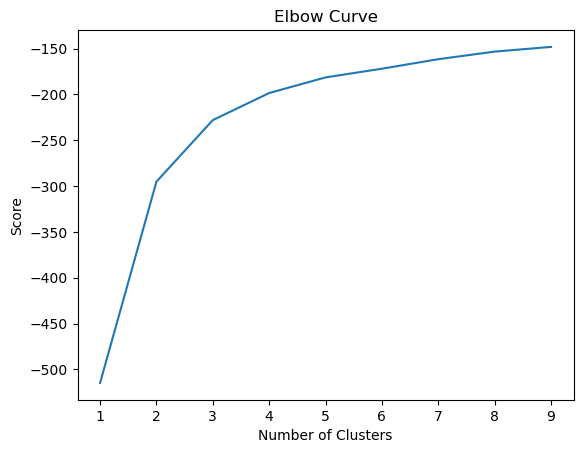

In [35]:
# Plot the elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### Comment
- The curve starts to flatten out from 3 onwards, meaning 3 appears to be the appropriate number of clusters.

# k-means clustering

In [36]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3) 

In [37]:
# Fit the object
kmeans.fit(df_matrix)

KMeans(n_clusters=3)

# New column

In [38]:
# Create 'clusters' variable
df_matrix['clusters'] = kmeans.fit_predict(df_matrix)

In [39]:
# Preview
df_matrix.head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,clusters
1,8.75,8.67,8.50,8.58,8.42,8.42,1
4,8.25,8.50,8.25,8.50,8.42,8.33,1
6,8.42,8.50,8.33,8.50,8.25,8.25,1
9,8.08,8.58,8.50,8.50,7.67,8.42,1
18,8.42,8.25,8.08,8.17,7.92,8.00,1


In [40]:
# Frequency of 'clusters' variable
df_matrix['clusters'].value_counts()

clusters
0    468
1    280
2    197
Name: count, dtype: int64

# Visualisations

## Hypothesis #1
- The higher the score for Aftertaste, the higher the score for Flavor would be.<br><br>



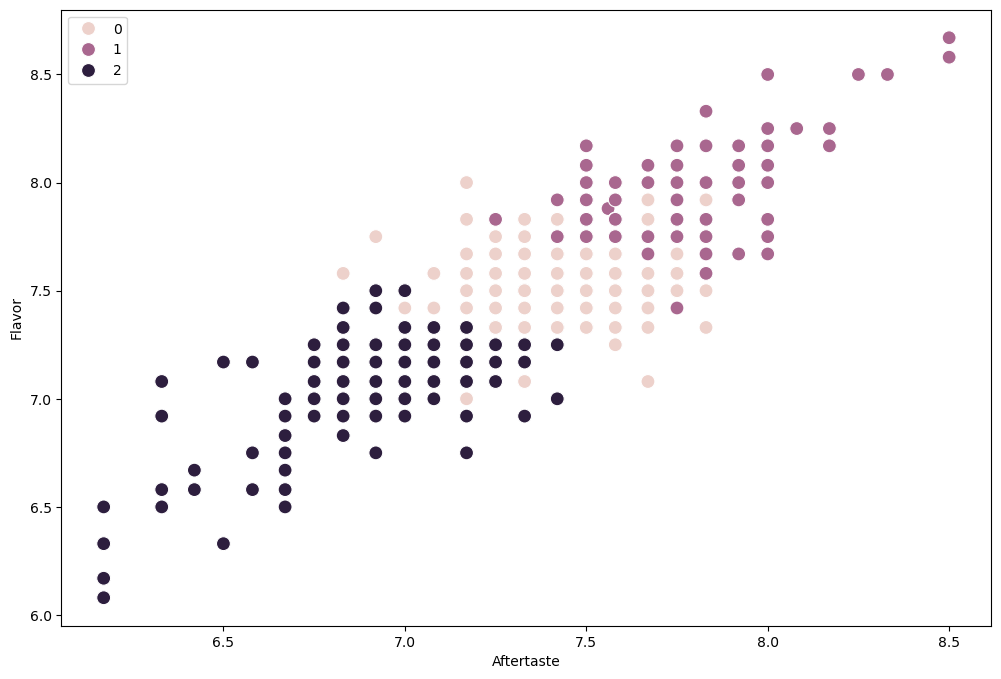

In [41]:
# Cluster plot - "Aftertaste" and "Flavor"
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_matrix['Aftertaste'], y = df_matrix['Flavor'], hue = kmeans.labels_, s = 100) 

ax.grid(False) 
plt.xlabel('Aftertaste') 
plt.ylabel('Flavor') 
plt.show()

##### Comments
- Scatterplot shows clear grouping of data points
- Clusters differentiate based on the magnitutde of the variables
    - Dark purple: High quality Flavor and Aftertaste
    - Pink: Medium quality Flavor and Aftertaste
    - Purple: Low quality Flavor and Aftertaste

## Hypothesis #2
- The higher the score for Aftertaste, the higher the score for Balance would be.<br><br>

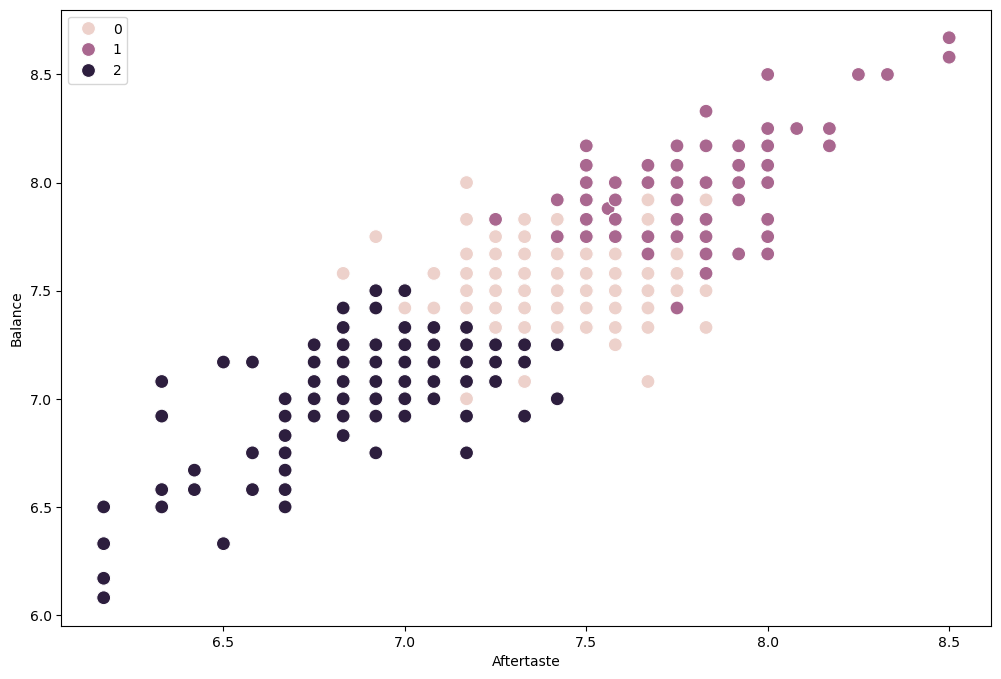

In [42]:
# Cluster plot - "Aftertaste" and "Flavor"
plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_matrix['Aftertaste'], y = df_matrix['Flavor'], hue = kmeans.labels_, s = 100) 

ax.grid(False) 
plt.xlabel('Aftertaste') 
plt.ylabel('Balance') 
plt.show()

##### Comments
- Scatterplot shows clear grouping of data points
- Clusters differentiate based on the magnitutde of the variables
    - Dark purple: High quality Balance and Aftertaste
    - Pink: Medium quality Balance and Aftertaste
    - Purple: Low quality Balance and Aftertaste

# Descriptive statistics

In [43]:
# Assign corresponding colour to the clusters
df_matrix.loc[df_matrix['clusters'] == 2, 'cluster_color'] = 'dark purple'
df_matrix.loc[df_matrix['clusters'] == 1, 'cluster_color'] = 'purple'
df_matrix.loc[df_matrix['clusters'] == 0, 'cluster_color'] = 'pink'

In [44]:
# Calculate statistics
df_matrix.groupby('cluster_color').agg({'Aroma':['mean', 'median'], 
    'Flavor':['mean', 'median'], 
    'Aftertaste':['mean', 'median'],
    'Acidity':['mean', 'median'],
    'Body':['mean', 'median'],
    'Balance':['mean', 'median']})

Aroma           Flavor        Aftertaste          Acidity  \
                   mean median      mean median       mean median      mean   
cluster_color                                                                 
dark purple    7.257665   7.25  7.097411   7.17   6.970457   7.00  7.210406   
pink           7.546880   7.58  7.516453   7.50   7.393654   7.42  7.501688   
purple         7.811464   7.75  7.802107   7.75   7.688571   7.67  7.804143   

                          Body          Balance         
              median      mean median      mean median  
cluster_color                                           
dark purple     7.25  7.228071   7.25  7.097817   7.17  
pink            7.50  7.480769   7.50  7.498333   7.50  
purple          7.75  7.751464   7.75  7.817679   7.75

##### Comments
- Going forward, these categorisations could be applied to determine the following:
    - If there are certain species or varieties that have better scores than others?
    - If certain processing methods score better than others?
    - If certain years have better overall scores than others?

# Task

## Install and import all necessary libraries in your Jupyter notebook.

##### Refer 1: Importing libraries<br><br>

## Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).
- Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.
- Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

##### Refer 2: Importing data
##### Refer 4: Wrangling<br><br>

## Use the elbow technique as shown in the Jupyter notebook for this Exercise.

##### Refer 5: Elbow technique<br><br>

## Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
- Explain why you chose that number in a markdown cell.
- If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.

##### Refer 5: Elbow technique - Markdown<br><br>

## Run the k-means algorithm.

##### Refer 6: k-means<br><br>

## Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

##### Refer 7: New column<br><br>

## Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

##### Refer 8: Visualisations<br><br>

## Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
- Note down your thoughts in a markdown cell.

##### Refer 8.1 Hypothesis #1 - Markdown
##### Refer 8.2 Hypothesis #2 - Markdown<br><br>

## Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

##### Refer 9: Descriptive statistics<br><br>

## Propose what these results could be useful for in future steps of an analytics pipeline.

##### Refer 9: Descriptive statistics - Markdown<br><br>

## Save your notebook and submit it for your tutor to review.

##### Notebook saved and submitted<br><br>